In [1]:
# =========================================================
# 🔌 Cargar entorno y librerías
# =========================================================
%load_ext kedro.ipython

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# =========================================================
# 1️⃣ Cargar dataset desde Kedro
# =========================================================
df = catalog.load("Features_training_v2").copy()
print("Shape del dataset:", df.shape)

# =========================================================
# 2️⃣ Seleccionar variables según la hipótesis
# =========================================================
features = [
    "Monetary",
    "TimeSinceLastTxn",
    "Recency",
    "TxnCountInLast24Hours",
    "AmountZScoreByLocation"
]
target = "TransactionAmount (INR)"

df_model = df[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

[10/24/25 02:06:15] INFO     Using                                                                  ]8;id=615079;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=100860;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\                
                             framework\project\rich_logging.yml' as logging configuration.                         

[10/24/25 02:06:16] INFO     Registered line magic '%reload_kedro'                                   ]8;id=613081;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=275931;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=892420;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=998723;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=882778;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=955438;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#180\180]8;;\
                             C:\Users\Kevin\Documents\GitHub\Ml_Bank\proyecto-ml-sebastiancarrera-k                
                             evinvivanco.                                                                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/24/25 02:06:20] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=771693;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=309875;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[10/24/25 02:06:21] INFO     Kedro project Proyecto_ML_SebastianCarrera_KevinVivanco                ]8;id=116589;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=646173;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=21552;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=330058;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#147\147]8;;\
                             'pipelines'                                                                           

[10/24/25 02:06:22] INFO     Registered line magic 'run_viz'                                        ]8;id=929008;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=994585;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\ipython\__init__.py#153\153]8;;\

[10/24/25 02:06:37] INFO     Loading data from Features_training_v2 (ParquetDataset)...        ]8;id=464583;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=468494;file://C:\Users\Kevin\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Shape del dataset: (984240, 6)


Mejor parámetro alpha: {'alpha': 0.01}
R² medio (CV): 0.9658465643516566

===== Métricas del Modelo Ridge =====
R²: 0.966
MSE: 23692.473
RMSE: 153.924
MAE: 91.052


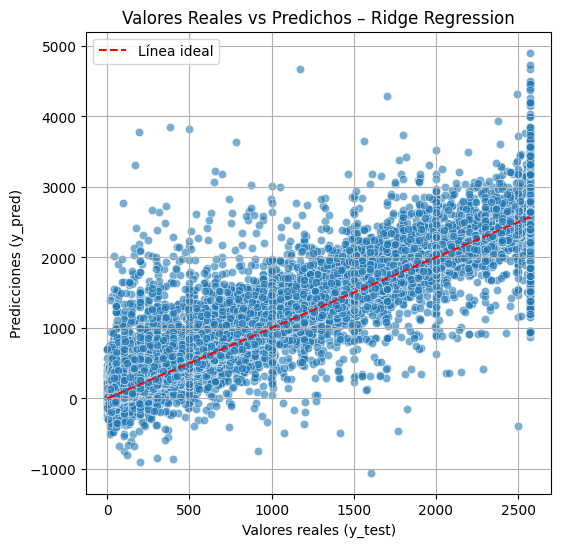

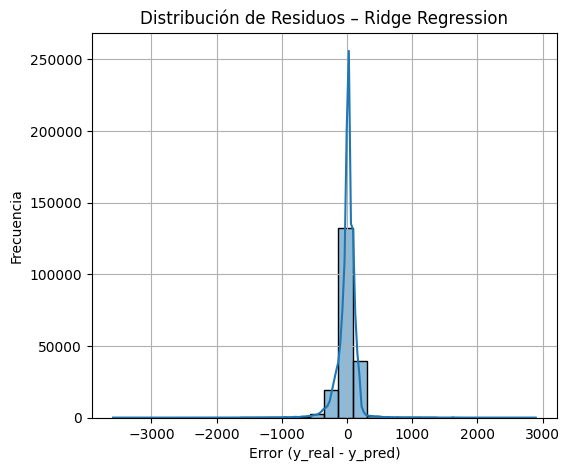

[10/24/25 02:07:30] WARNING  C:\Users\Kevin\AppData\Local\Temp\ipykernel_6308\2980678445.py:91:     ]8;id=195044;file://C:\Python313\Lib\warnings.py\warnings.py]8;;\:]8;id=992213;file://C:\Python313\Lib\warnings.py#110\110]8;;\
                             FutureWarning:                                                                        
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(data=coef_df, x="Coeficiente", y="Variable",                            
                             palette="Blues_r")                                                                    
                                                                                                                   

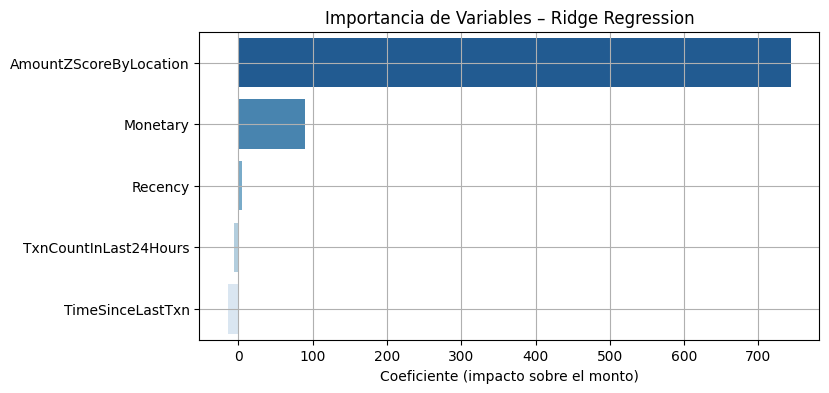

In [2]:
# =========================================================
# 3️⃣ División Train/Test + Estandarización
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================================================
# 4️⃣ Definir modelo Ridge + GridSearchCV
# =========================================================
ridge = Ridge()

param_grid = {
    "alpha": [0.01, 0.1, 1, 10, 100, 1000]  # nivel de regularización
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_ridge = GridSearchCV(
    ridge,
    param_grid=param_grid,
    cv=cv,
    scoring="r2",
    n_jobs=-1
)

# =========================================================
# 5️⃣ Entrenamiento con validación cruzada
# =========================================================
grid_ridge.fit(X_train_scaled, y_train)

print("Mejor parámetro alpha:", grid_ridge.best_params_)
print("R² medio (CV):", grid_ridge.best_score_)

# =========================================================
# 6️⃣ Evaluación final en conjunto de prueba
# =========================================================
best_ridge = grid_ridge.best_estimator_

y_pred = best_ridge.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\n===== Métricas del Modelo Ridge =====")
print(f"R²: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# =========================================================
# 7️⃣ Gráficos de evaluación
# =========================================================

# 🎯 a) Valores reales vs predichos
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Línea ideal')
plt.title("Valores Reales vs Predichos – Ridge Regression")
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.legend()
plt.grid(True)
plt.show()

# 🎯 b) Distribución de residuos
residuals = y_test - y_pred
plt.figure(figsize=(6,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribución de Residuos – Ridge Regression")
plt.xlabel("Error (y_real - y_pred)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# 🎯 c) Coeficientes del modelo
coef_df = pd.DataFrame({
    "Variable": features,
    "Coeficiente": best_ridge.coef_
}).sort_values(by="Coeficiente", ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(data=coef_df, x="Coeficiente", y="Variable", palette="Blues_r")
plt.title("Importancia de Variables – Ridge Regression")
plt.xlabel("Coeficiente (impacto sobre el monto)")
plt.ylabel("")
plt.grid(True)
plt.show()


El modelo Ridge Regression, con el mejor parámetro de regularización α = 0.01, obtuvo un desempeño prácticamente idéntico al modelo lineal, alcanzando un R² = 0.966 y un MSE = 23 692.47, lo que confirma que la relación entre las variables predictoras y el monto de transacción es altamente lineal y estable. La validación cruzada (R² medio = 0.9658) refuerza la consistencia del ajuste y demuestra que la inclusión del término de penalización L2 no afectó la capacidad explicativa del modelo. Los gráficos y_real vs y_pred y la distribución de residuos muestran un patrón similar al modelo base: buena alineación con la línea ideal y errores centrados en torno a cero, lo que indica un ajuste adecuado sin tendencia sistemática.

Aunque las métricas no mejoraron, la regularización Ridge cumple un rol importante al reducir la sensibilidad del modelo ante posibles correlaciones entre variables y estabilizar los coeficientes frente a fluctuaciones o ruido. El análisis de importancia de variables mantiene el mismo orden de influencia, destacando nuevamente a AmountZScoreByLocation y Monetary como los factores de mayor peso en la predicción del gasto futuro. En síntesis, Ridge confirma la solidez del modelo lineal y garantiza una estructura más robusta ante futuras extensiones del conjunto de datos o la inclusión de nuevas variables.